# Find the Most Similar Records

In [46]:
import warnings
warnings.simplefilter('ignore')

# Make figure inline
%matplotlib inline

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [48]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import NearestNeighbors

In [49]:
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
data = pd.read_csv("data/iris.csv", names=names)

In [50]:
data.head(10)

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [51]:
data = shuffle(data)

In [52]:
data.head(10)

,sepal-length,sepal-width,petal-length,petal-width,Class
80,5.5,2.4,3.8,1.1,Iris-versicolor
129,7.2,3.0,5.8,1.6,Iris-virginica
23,5.1,3.3,1.7,0.5,Iris-setosa
146,6.3,2.5,5.0,1.9,Iris-virginica
42,4.4,3.2,1.3,0.2,Iris-setosa
77,6.7,3.0,5.0,1.7,Iris-versicolor
17,5.1,3.5,1.4,0.3,Iris-setosa
135,7.7,3.0,6.1,2.3,Iris-virginica
14,5.8,4.0,1.2,0.2,Iris-setosa
21,5.1,3.7,1.5,0.4,Iris-setosa


In [53]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 4].values

In [54]:
X[:10]

array([[5.5, 2.4, 3.8, 1.1],
       [7.2, 3. , 5.8, 1.6],
       [5.1, 3.3, 1.7, 0.5],
       [6.3, 2.5, 5. , 1.9],
       [4.4, 3.2, 1.3, 0.2],
       [6.7, 3. , 5. , 1.7],
       [5.1, 3.5, 1.4, 0.3],
       [7.7, 3. , 6.1, 2.3],
       [5.8, 4. , 1.2, 0.2],
       [5.1, 3.7, 1.5, 0.4]])

In [55]:
y[:10]

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [59]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(len(X), len(y))
X_train = X[:120]
y_train = y[:120]
X_test = X[120:]
y_test = y[120:]

150 150


In [60]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [61]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [62]:
y_pred = classifier.predict(X_test)

In [63]:
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor'],
      dtype=object)

In [64]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 9  0  0]
 [ 0 13  1]
 [ 0  1  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.93      0.93      0.93        14
 Iris-virginica       0.86      0.86      0.86         7

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



In [65]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

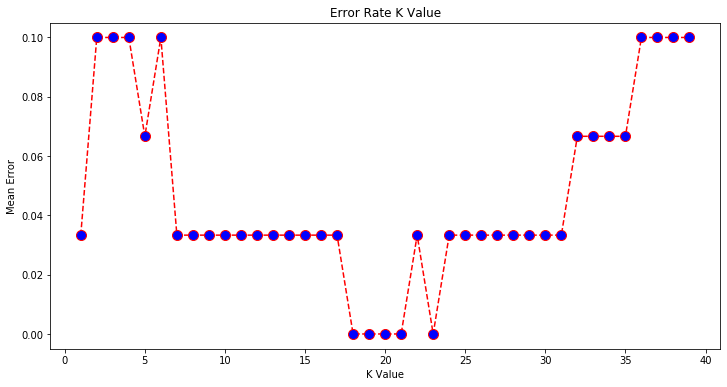

In [66]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [73]:
neigh = NearestNeighbors(n_neighbors=20)

In [74]:
neigh.fit(X_train)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                 radius=1.0)

In [75]:
neigh.kneighbors([X_test[0]])

(array([[0.22199682, 0.2387988 , 0.26524981, 0.37984384, 0.46333013,
         0.4651899 , 0.47865585, 0.48501185, 0.49856703, 0.53733661,
         0.55965003, 0.63212354, 0.64494781, 0.72282906, 0.73614733,
         0.79331692, 0.84827024, 0.92385038, 0.94534665, 0.98228485]]),
 array([[102,  35,  94,  95, 118,  16,  69,  45,  97,  93,  62,  13, 103,
         111,  20,  57, 109,  48,  50,  59]]))

In [76]:
X_test[0]

array([-0.20206698, -0.63871499,  0.18083491,  0.11197779])

In [77]:
data.iloc[102]

sepal-length                5.7
sepal-width                 2.8
petal-length                4.5
petal-width                 1.3
Class           Iris-versicolor
Name: 55, dtype: object